In [36]:
import proplot as plot
import warnings
warnings.filterwarnings("ignore")
plot.rc['figure.facecolor'] = 'white'

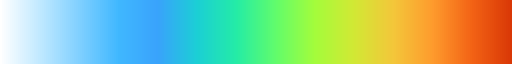

In [37]:
from matplotlib.image import imread
from matplotlib.colors import LinearSegmentedColormap

cmap2=plot.Colormap('turbo')
cmap2

ll=['w',

   '#c0e9ff', # 浅蓝色
'#80d0ff', # 淡蓝色
'#40b8ff', # 中蓝色

   ]+cmap2.to_listed(15).colors[3:-2]

my_cmap = LinearSegmentedColormap.from_list('my_cmap', ll, N=256)
my_cmap

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_percentage_error

# 使用sklearn调用衡量线性回归的MSE 、 RMSE、 MAE、r2
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def density_scatter( x , y, ax = None, sort = True, bins = 20,percent=80,metawidth=0.4, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]
    
    
    m=ax.scatter( x, y, c=z, vmax=np.percentile(z, percent),vmin=0,**kwargs )#vmax=80%
    
    if 'cmap' in kwargs:
    # 包含cmap参数
        cmap = kwargs['cmap']
    vmin = np.min(z)
    vmax = np.max(z)
    if 'vmin' in kwargs:
    # 包含cmap参数
        vmin = kwargs['vmin']    
    if 'vmax' in kwargs:
    # 包含cmap参数
        vmax = kwargs['vmax'] 
        
    norm = Normalize(vmin = vmin, vmax = vmax)
    #cbar = ax.colorbar(cm.ScalarMappable(norm = norm,cmap=cmap))
#     cbar=ax.colorbar(m,loc='r',lw=metawidth)
#     cbar.ax.set_ylabel('Density')

    return ax,m



In [40]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# 生成随机数据
np.random.seed(0)
n_samples = 100
x = np.random.rand(n_samples)*1e17
y = 1 * x + np.random.randn(n_samples)*1e16  # y = 2x + 噪声
index=np.isnan(x)+np.isnan(y)
x=x[~index]
y=y[~index]

# 计算指标
R = pearsonr(x, y)[0]
print("Pearson correlation coefficient:", R)

mae = mean_absolute_error(x, y)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(x, y)
print("Mean Squared Error:", mse)

rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(x, y)
print("R² Score:", r2)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(x, y)
print("Mean Absolute Percentage Error:", mape)


Pearson correlation coefficient: 0.9445225692562869
Mean Absolute Error: 8623845994287560.0
Mean Squared Error: 1.0297617241074742e+32
Root Mean Squared Error: 1.0147717596127092e+16
R² Score: 0.8761081822858403
Mean Absolute Percentage Error: 37.05495834074733


In [41]:
x

array([5.48813504e+16, 7.15189366e+16, 6.02763376e+16, 5.44883183e+16,
       4.23654799e+16, 6.45894113e+16, 4.37587211e+16, 8.91773001e+16,
       9.63662761e+16, 3.83441519e+16, 7.91725038e+16, 5.28894920e+16,
       5.68044561e+16, 9.25596638e+16, 7.10360582e+15, 8.71292997e+15,
       2.02183974e+15, 8.32619846e+16, 7.78156751e+16, 8.70012148e+16,
       9.78618342e+16, 7.99158564e+16, 4.61479362e+16, 7.80529176e+16,
       1.18274426e+16, 6.39921021e+16, 1.43353287e+16, 9.44668917e+16,
       5.21848322e+16, 4.14661940e+16, 2.64555612e+16, 7.74233689e+16,
       4.56150332e+16, 5.68433949e+16, 1.87898004e+15, 6.17635497e+16,
       6.12095723e+16, 6.16933997e+16, 9.43748079e+16, 6.81820299e+16,
       3.59507901e+16, 4.37031954e+16, 6.97631196e+16, 6.02254716e+15,
       6.66766715e+16, 6.70637870e+16, 2.10382561e+16, 1.28926298e+16,
       3.15428351e+16, 3.63710771e+16, 5.70196770e+16, 4.38601513e+16,
       9.88373838e+16, 1.02044811e+16, 2.08876756e+16, 1.61309518e+16,
      

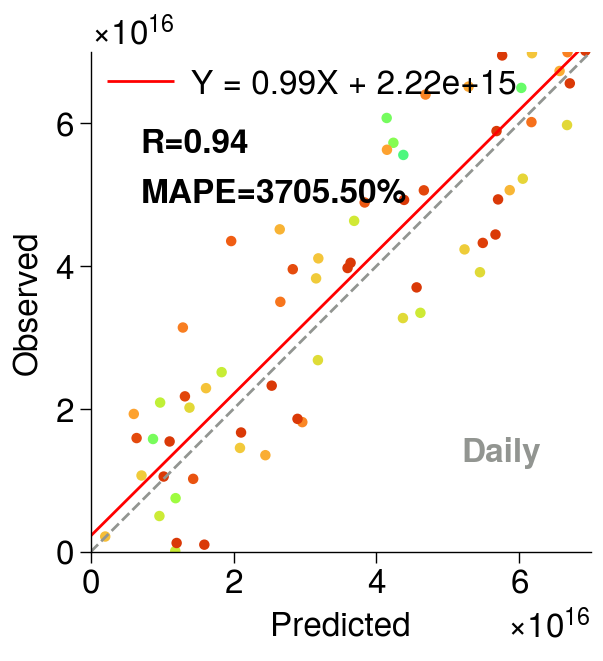

In [42]:
fontsize=12
metawidth=0.5

fig,axs=plot.subplots(refwidth=2.5,refheight=2.5)

fig.format(abc=False,suptitlesize=20,xlim=(0,7e16),ylim=(0,7e16),xlabel='Predicted'
           ,ylabel='Observed'
           ,grid=False,xtickminor=False,ytickminor=False,metawidth=metawidth,labelsize=fontsize#,xlabelpad=10
           ,xlocator=2e16,ylocator=2e16)
ax=axs[0]
ax,m=density_scatter(x[::1],y[::1] ,ax=ax, s=10,bins=(500, 500),cmap=my_cmap,alpha=1#'rainbow'
              ,percent=80 )



# 拟合线性回归线
slope, intercept = np.polyfit(x,y, 1)
x0=np.arange(0,10e16,1e16)
regression_line = slope * x0 + intercept




# 在图表中标注线性拟合的公式
equation = f'Y = {slope:.2f}X + {intercept:.2e}'
#ax.annotate(equation, xy=(x.mean(), y[::10].mean()), fontsize=10, color='r'
#           ,bbox=dict(boxstyle="round,pad=0.3", edgecolor="none", facecolor="white"))


l2=ax.plot(x0, regression_line, color='red',label=equation,lw=1)
ax.plot(x0, x0, color='grey',lw=1,linestyle='--')
ax.legend([l2],loc='ul',frameon=False,prop=dict(size=fontsize))
ax.text(0.1,0.8,f'R={R:.2f}'
        ,fontweight='bold'
        ,fontsize=fontsize, transform=ax.transAxes)
ax.text(0.1,0.7,f'MAPE={mape:.2%}'
        ,fontweight='bold'
        ,fontsize=fontsize, transform=ax.transAxes)


ax.text(0.9,0.2,f'Daily'
        ,fontweight='bold',color='grey',horizontalalignment='right',  # 水平居中
        verticalalignment='center'  # 垂直居中
        ,fontsize=fontsize, transform=ax.transAxes)
ax.yaxis.offsetText.set_fontsize(fontsize)
ax.xaxis.offsetText.set_fontsize(fontsize)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.format(labelsize=fontsize,ticklabelsize=fontsize)

fname='daily2022'
# fig.savefig(f'./fig_val/{fname}.jpg',dpi=1000)
# fig.savefig(f'./fig_val/{fname}.pdf',dpi=1000)
# fig.savefig(f'./fig_val/{fname}.eps',dpi=1000)